### Prediction of Hospital Readmissions: Improving Healthcare

**Problem:**
Investigate the problem of predicting readmission of hospital patients. Readmission of patients following discharge from the hospital places an enormous and very expensive burden on the US healthcare system (estimated at $40B in 2011).

**Objective:**
The objective of predictive analysis is to build a binary classification model that can predict early (<30 days) readmission given the patient’s features.

**Dataset Summary:**
The dataset (diabetic_data.csv) represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria. 

In [219]:
#file path
path = r "/Users/addltariq/Documents/GitHub/Prediction-of-Hospital-Readmissions-Improving-Healthcare-using-predictive-modeling-python/"
train_data =  "diabetic_data_test.csv"
test_data =   "diabetic_data_train.csv"

path_file_data_test = path + "diabetic_data_test.csv"
path_file_data_train = path + "diabetic_data_train.csv"

path_model_results = r'C:/Users/addlt/Documents/GitHub/Prediction-of-Hospital-Readmissions-Improving-Healthcare-using-predictive-modeling-python/Model_Results.xlsx'

In [ ]:
#Libraries pre-requisites

import pandas as pd
import numpy as np
from collections import Counter
import math
import statistics as st
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score
import imblearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import  BernoulliNB
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## Data Loading

In [82]:
data_train_explore = pd.read_csv(path_file_data_train)
final = data_train_explore

## Data Exploritory Analysis

### Python based Analysis

Running Exploritory Analysis on the Training set!

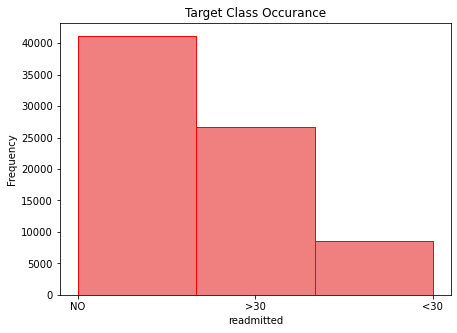

Findings:
Target Class Imbalance!, (>30 & none) class overwells the required target class (<30)


In [157]:
#Target Class inspection
plt.figure(figsize = (7,5))
data_c = data_train_explore['readmitted']
plt.title("Target Class Occurance")
plt.xlabel("readmitted")
plt.ylabel("Frequency")
#plt.hist (data_cr, bins = 'auto', color = "royalblue", edgecolor='black',rwidth=10)
plt.hist(data_c, color = "lightcoral", edgecolor='red', bins=data_train_explore['readmitted'].nunique()) 
plt.show()

print('Findings:')
print('Target Class Imbalance!, (>30 & none) class overwells the required target class (<30)')

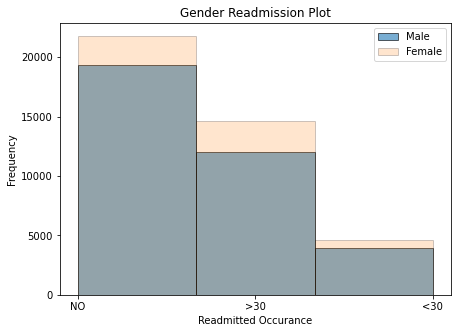

Findings:
Readmitted <30 count is low showing target class imbalance but even across genders. Split is quite even across both the groups.


In [161]:
 # Gender trends related to readmission
plt.figure(figsize = (7,5))

dx_m = pd.DataFrame()
dx_m = data_train_explore[(data_train_explore['gender'] == "Male")] 
dx_a = dx_m['readmitted']

dx_f = pd.DataFrame()
dx_f = data_train_explore[(data_train_explore['gender'] == "Female")] 
dx_b = dx_f['readmitted']


plt.title("Gender Readmission Plot")
plt.xlabel("Readmitted Occurance")
plt.ylabel("Frequency")
#plt.hist (data_cr, bins = 'auto', color = "royalblue", edgecolor='black',rwidth=10)
plt.hist(dx_a, edgecolor='black', bins=data_train_explore['readmitted'].nunique(), alpha = 0.6, label='Male')
plt.hist(dx_b, edgecolor='black', bins=data_train_explore['readmitted'].nunique(), alpha = 0.2, label = 'Female')  
plt.legend(loc='upper right')
plt.show()

print('Findings:')
print('Readmitted <30 count is low showing target class imbalance but even across genders. Split is quite even across both the groups.')

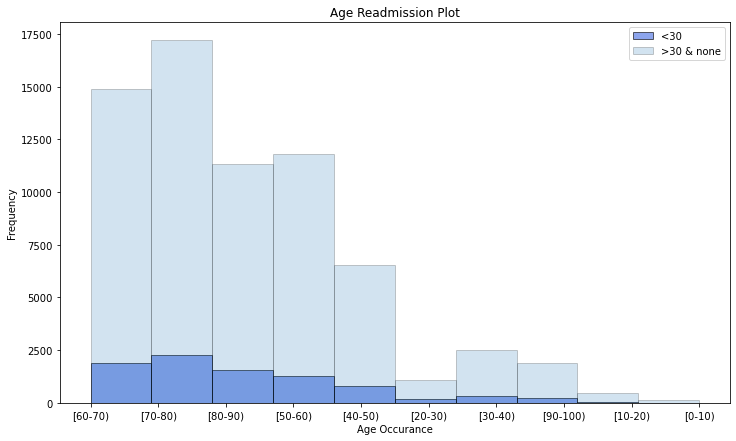

Findings:
Readmitted (>30 & none) count has alot of variance across age groups, and will have to be managed. Patient count only increase when age>50.


In [162]:
#Age study of patients being readmitted to the hospital
plt.figure(figsize = (12,7))

dx_l30 = pd.DataFrame()
dx_l30 = data_train_explore[(data_train_explore['readmitted'] == "<30")] 
dx_c = dx_l30['age']

dx_m30 = pd.DataFrame()
dx_m30 =  data_train_explore[~(data_train_explore['readmitted'] == "<30")] 
dx_d = dx_m30['age']


plt.title("Age Readmission Plot")
plt.xlabel("Age Occurance")
plt.ylabel("Frequency")
#plt.hist (data_cr, bins = 'auto', color = "royalblue", edgecolor='black',rwidth=10)
plt.hist(dx_c, edgecolor='black', bins=data_train_explore['age'].nunique(), alpha = 0.6, label='<30',color = "royalblue")
plt.hist(dx_d, edgecolor='black', bins=data_train_explore['age'].nunique(), alpha = 0.2, label = '>30 & none')  
plt.legend(loc='upper right')
plt.show()

print('Findings:')
print('Readmitted (>30 & none) count has alot of variance across age groups, and will have to be managed. Patient count only increase when age>50.')

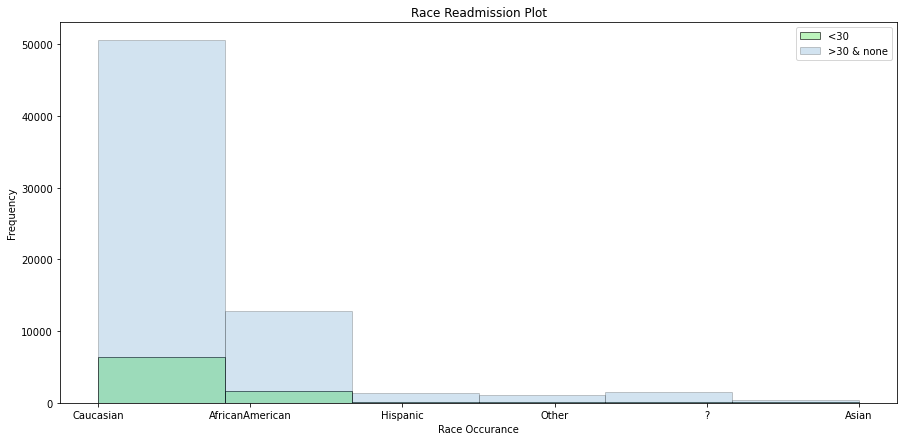

Findings:
Readmitted (>30 & none) count has alot baise across African and Caucasian race.


In [163]:
#Race study of patients being readmitted to the hospital
plt.figure(figsize = (15,7))

dx_l30 = pd.DataFrame()
dx_l30 = data_train_explore[(data_train_explore['readmitted'] == "<30")] 
dx_c = dx_l30['race']

dx_m30 = pd.DataFrame()
dx_m30 =  data_train_explore[~(data_train_explore['readmitted'] == "<30")] 
dx_d = dx_m30['race']


plt.title("Race Readmission Plot")
plt.xlabel("Race Occurance")
plt.ylabel("Frequency")
#plt.hist (data_cr, bins = 'auto', color = "royalblue", edgecolor='black',rwidth=10)
plt.hist(dx_c, edgecolor='black', bins=data_train_explore['race'].nunique(), alpha = 0.6, label='<30',color = "lightgreen")
plt.hist(dx_d, edgecolor='black', bins=data_train_explore['race'].nunique(), alpha = 0.2, label = '>30 & none')  
plt.legend(loc='upper right')
plt.show()


print('Findings:')
print('Readmitted (>30 & none) count has alot baise across African and Caucasian race.')

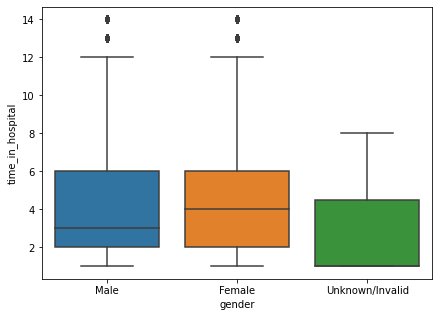

In [158]:
#Gender vs Time in Hospital Spent
plt.figure(figsize = (7,5))
ax_h1 = sns.boxplot(x="gender", y="time_in_hospital", data=data_train_explore)
print('Alot of outliers and extreme cases can be seen in both gender cases for the time spent in the hospital with the mean lying at 5 days for the overall population')

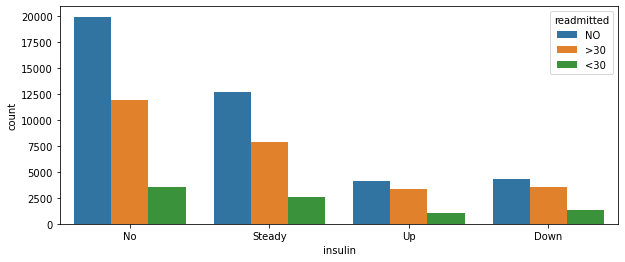

1/3 of the patient population had to be administrated with insulin


In [164]:
#Insulin VS Readmission status study
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x="insulin", hue="readmitted", data=data_train_explore)
plt.show()
print('1/3 of the patient population had to be administrated with insulin')

Old age patient population consisted of majority to be administrated with insulin


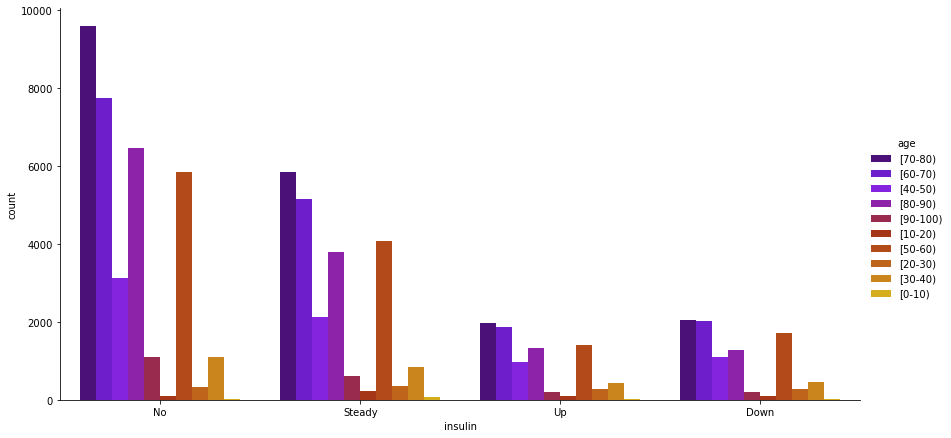

In [165]:
#Age, Insulin VS Readmission status study
age_list = list(data_train_explore.age.unique())
sns.catplot(x="insulin", hue="age", data=data_train_explore, kind="count", height=6, aspect=2, palette="gnuplot");
print('Old age patient population consisted of majority to be administrated with insulin')

### Null Value Analysis

<b> Note: </b> This process is to only identify the number of null values for variables either with missing values, Non-avalible and ambigious categories e.g. (?). Solution statement of handling these cases for some columns is given  which is implemented later in the notebook.

List of columns to be observed are:
- Medical Specialty
- Payer Code
- Weight
- Citoglipton & Examide - Medicines administered
- Admission Source
- Admission Type
- Discharge Deposition
- Age
- Race
- Gender

In [88]:
print("Medical Specialty:")

index_null_mspec = data_train_explore[(data_train_explore['medical_specialty'] == '?')]
index_notnull_mspec = data_train_explore[~(data_train_explore['medical_specialty'] == '?')]

print('Null values:', len(index_null_mspec))
print('Correct values:', len(index_notnull_mspec))

print('P% null issue left:', round(len(index_null_mspec)/len(final)*100,2),"%")

pd.value_counts(data_train_explore.medical_specialty)
data_train_explore.loc[(data_train_explore.medical_specialty == "?"),'medical_specialty'] = "Missing"


Medical Specialty:
Null values: 37482
Correct values: 38842
P% null issue left: 49.11 %


In [89]:
#Drop payer Code & weight on the bases of missing values
print("Payer Code:")

index_null_pcode = data_train_explore[(data_train_explore['payer_code'] == '?')]
index_notnull_pcode = data_train_explore[~(data_train_explore['payer_code'] == '?')]

print('Null values:', len(index_null_pcode))
print('Correct values:', len(index_notnull_pcode))

print('P% null issue left:', round(len(index_null_pcode)/len(final)*100,2),"%")
print("")
print("Weight Breakdown:")

index_null_wei = data_train_explore[(data_train_explore['weight'] == '?')]
index_notnull_wei = data_train_explore[~(data_train_explore['weight'] == '?')]

print('Null values:', len(index_null_wei))
print('Correct values:', len(index_notnull_wei))

print('P% null issue left:', round(len(index_null_wei)/len(final)*100,2),"%")


Payer Code:
Null values: 30048
Correct values: 46276
P% null issue left: 39.37 %

Weight Breakdown:
Null values: 73935
Correct values: 2389
P% null issue left: 96.87 %


Conclusion - Weight & Payer Code needs to be dropped due to majority null values

In [90]:
#Drop these column on the bases of single class values
print("Examide Medicine:")
print(pd.value_counts(data_train_explore.examide))
print("")
print("Citoglipton Medicine:")
print(pd.value_counts(data_train_explore.citoglipton))

Examide Medicine:
No    76324
Name: examide, dtype: int64

Citoglipton Medicine:
No    76324
Name: citoglipton, dtype: int64


Conclusion - Medicine assignment of Citoglipton & Examide needs to be dropped due to single attribute type existance

In [91]:
print("Admission Source:")

index_null_admin_src = data_train_explore[(data_train_explore['admission_source_id'] == 9) | (data_train_explore['admission_source_id'] == 15) | (data_train_explore['admission_source_id'] == 17)|(data_train_explore['admission_source_id'] == 20) | (data_train_explore['admission_source_id'] == 21)]
index_notnull_admin_src = data_train_explore[~((data_train_explore['admission_source_id'] == 9) | (data_train_explore['admission_source_id'] == 15) | (data_train_explore['admission_source_id'] == 17)|(data_train_explore['admission_source_id'] == 20) | (data_train_explore['admission_source_id'] == 21))]

print('Null values:', len(index_null_admin_src))
print('Correct values:', len(index_notnull_admin_src))

print('P% null issue left:', round(len(index_null_admin_src)/len(final)*100,2),"%")


Admission Source:
Null values: 5252
Correct values: 71072
P% null issue left: 6.88 %


In [92]:
#[1, Emergency] [2, Urgent] [3, Elective] [4, Newborn] [7, Trauma Center]
#[5, Not Avaliable] [6, Null] [8, Not Mapped]

print("Admission type Breakdown:")
index_null_admin = data_train_explore[(data_train_explore['admission_type_id'] == 6) | (data_train_explore['admission_type_id'] == 5) | (data_train_explore['admission_type_id'] == 8) ]
index_notnull_admin = data_train_explore[~((data_train_explore['admission_type_id'] == 6) | (data_train_explore['admission_type_id'] == 5) | (data_train_explore['admission_type_id'] == 8))]

print('Null values:', len(index_null_admin))
print('Correct values:', len(index_notnull_admin))

print('P% null issue left:', round(len(index_null_admin)/len(final)*100,2),"%")

Admission type Breakdown:
Null values: 7731
Correct values: 68593
P% null issue left: 10.13 %


In [93]:
print("Discharge Disposition:")
print(pd.value_counts(data_train_explore.discharge_disposition_id))
index_null_dis = data_train_explore[(data_train_explore['discharge_disposition_id'] == 18) | (data_train_explore['discharge_disposition_id'] == 25) | (data_train_explore['discharge_disposition_id'] == 26) ]
index_notnull_dis = data_train_explore[~((data_train_explore['discharge_disposition_id'] == 18) | (data_train_explore['discharge_disposition_id'] == 25) | (data_train_explore['discharge_disposition_id'] == 26))]

print('Null values:', len(index_null_dis))
print('Correct values:', len(index_notnull_dis))

print('P% null issue left:', round(len(index_null_dis)/len(final)*100,2),"%")

Discharge Disposition:
1     45166
3     10497
6      9708
18     2783
2      1559
22     1506
11     1197
5       900
25      732
4       588
7       466
23      325
13      296
14      280
28      108
8        81
15       50
24       33
9        16
16        7
17        6
19        5
10        5
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64
Null values: 3515
Correct values: 72809
P% null issue left: 4.61 %


In [94]:
print("Race Breakdown:")
print(pd.value_counts(data_train_explore.race))
index_null_race = data_train_explore[(data_train_explore['race'] == '?')]
index_notnull_race = data_train_explore[~(data_train_explore['race'] == '?')]
print("")
print('Null values:', len(index_null_race))
print('Correct values:', len(index_notnull_race))

print('P% null issue left:', round(len(index_null_race)/len(final)*100,2),"%")

Race Breakdown:
Caucasian          56938
AfricanAmerican    14519
?                   1708
Hispanic            1518
Other               1160
Asian                481
Name: race, dtype: int64

Null values: 1708
Correct values: 74616
P% null issue left: 2.24 %


In [95]:
print("Gender Breakdown:")
print(pd.value_counts(data_train_explore.gender))
index_null_gen = data_train_explore[(data_train_explore['gender'] == 'Unknown/Invalid')]
index_notnull_gen = data_train_explore[~(data_train_explore['gender'] == 'Unknown/Invalid')]
print("")
print('Null values:', len(index_null_gen))
print('Correct values:', len(index_notnull_gen))

print('P% null issue left:', round(len(index_null_gen)/len(final)*100,4),"%")
#Drop null value rows due to minimial count

Gender Breakdown:
Female             41008
Male               35313
Unknown/Invalid        3
Name: gender, dtype: int64

Null values: 3
Correct values: 76321
P% null issue left: 0.0039 %


In [96]:
# Smaller groups need to be grouped together
print("Age Breakdown:")
pd.value_counts(data_train_explore.age)

Age Breakdown:


[70-80)     19473
[60-70)     16772
[50-60)     13056
[80-90)     12870
[40-50)      7331
[30-40)      2821
[90-100)     2128
[20-30)      1252
[10-20)       501
[0-10)        120
Name: age, dtype: int64

## Pre-processing of Dataset (Train & Test)

Training and Testing Datasets require pre-processing before the algorithm is applied. Hence, both datasets are combined together with a unique identifier labeled 'dataset_type'. All methods in pre-processing will be applied to the combined dataset, unless mentioned clearly of individual application for each training and testing set.

In [97]:
data_train = pd.read_csv(path_file_data_train)
data_test = pd.read_csv(path_file_data_test)
data_test['dataset_type'] = 'test'
data_train['dataset_type'] = 'train'
list_dataframes = [data_train,data_test]
data = pd.concat(list_dataframes)

data.tail(2)

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,dataset_type
25440,11421,47282550,8819190,Caucasian,Male,[70-80),?,1,18,7,8,?,?,51,0,16,0,0,0,410,584,276,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,test
25441,52819,155779584,87812100,AfricanAmerican,Female,[50-60),?,1,1,7,8,DM,?,58,1,9,0,0,1,996,403,38,9,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,test


### Null Value Corrections of Feature Set

This section handles the Null values we have identified in the above columns by assigning them outlier values, identifier ID's and modes. 

#### Column: Admission Source

- Correction Step: Grouped Missing Values under a single ID

In [98]:
#Null Value Handling by grouping null value categories and outlier value
data.loc[(data.admission_source_id == 15) |  (data.admission_source_id == 9) | (data.admission_source_id == 17) | (data.admission_source_id == 20)| (data.admission_source_id == 21),'admission_source_id'] = -99

#### Column: Admission Type

- Correction Step: Grouped Missing Values under a single ID

In [99]:
#Null Value Handling by grouping null value categories and outlier value
data.loc[(data.admission_type_id == 6) |  (data.admission_type_id == 5) | (data.admission_type_id == 8) ,'admission_type_id'] = -99

#### Column: Discharge Disposition

- Correction Step: Grouped Missing Values under a single ID

In [100]:
#Null Value Handling by grouping null value categories and assigning an ID
data.loc[(data.discharge_disposition_id == 18) |  (data.discharge_disposition_id == 25) | (data.discharge_disposition_id == 26) ,'discharge_disposition_id'] = 0

#### Column: Race

- Correction Step: Replacing Null category with Mode value of the feature set ( Mode = Caucasian)

In [101]:
#Replacing missing values with mode 
data.loc[(data.race == '?') ,'race'] = st.mode(data['race'])
print(st.mode(data['race']))

Caucasian


#### Column: Gender

- Correction Step: Remove the Gender rows with unknown values since they account to 3 only

In [102]:
#Null Value Handling by dropping rows
data = data[~(data['gender'] == 'Unknown/Invalid')]
data.shape

(101763, 52)

### Modifications of Features Set

#### Columns: A1Cresult, max_glu_serum, Change (Medicine Changes column), Admission Type ID & Age

- Improvement Step: Grouping & Encoding for generalisated categories

In [104]:
#A1Cresult
# (1 is >7 & >8) & (0 is Normal ) & (-99 is Missing values) - (>7 and 8 combined due to similar outcomes with the patients) 
data.loc[(data.A1Cresult == ">7"),'A1Cresult'] = 1
data.loc[(data.A1Cresult == ">8"),'A1Cresult'] = 1
data.loc[(data.A1Cresult == "Norm"),'A1Cresult'] = 0
data.loc[(data.A1Cresult == "None"),'A1Cresult'] = -99

#max_glu_serum
# (1 is >200 & >300) & (0 is Normal ) & (-99 is Missing values) - (>200 and 300 combined due to similar outcomes with the patients high glu_srum)
data.loc[(data.max_glu_serum == ">200"),'max_glu_serum'] = 1
data.loc[(data.max_glu_serum == ">300"),'max_glu_serum'] = 1
data.loc[(data.max_glu_serum == "Norm"),'max_glu_serum'] = 0
data.loc[(data.max_glu_serum == "None"),'max_glu_serum'] = -99

#Change Column
# (1 has been changed) & (0 is Med not changed)
data.loc[(data.change == "No"),'change'] = 0
data.loc[(data.change == "Ch"),'change'] = 1

# #diabetesMed - Better to ONE HOT ENCODE
# # (Diabetes Medication given 1) & (Diabetes Medication given 0)
# data.loc[(data.diabetesMed == "No"),'diabetesMed'] = 0
# data.loc[(data.diabetesMed == "Yes"),'diabetesMed'] = 1

#Admission Type ID Column
# (Critical - 3) & (Elective - 1) & (Newborn - 2) & (Missing values - 99) - Grouping likewise categories and assigning values accordng to importance, missing value also given an outlier id
data.loc[(data.admission_type_id == 1) |  (data.admission_type_id == 2) | (data.admission_type_id == 7),'admission_type_id'] = 3
data.loc[(data.admission_type_id == 3),'admission_type_id'] = 1
data.loc[(data.admission_type_id == 0),'admission_type_id'] = -99
data.loc[(data.admission_type_id == 4),'admission_type_id'] = 2

#Age Column - Age categories by modify group range t0 [0-50], [0-40] group didnt perform well when compared to [0-50] category in model predictions.
 
#data.loc[(data['age'] == '[0-10)') | (data['age'] == '[10-20)')| (data['age'] == '[20-30)')| (data['age'] == '[30-40)'),'age'] = '[0-40)'  
data.loc[(data['age'] == '[0-10)') | (data['age'] == '[10-20)')| (data['age'] == '[20-30)')| (data['age'] == '[30-40)')| (data['age'] == '[40-50)'),'age'] = '[0-50)' 
data.loc[(data['age'] == '[80-90)') | (data['age'] == '[90-100)'),'age'] = '[80-100)' 

data['change'] = data['change'].astype(float)
data['max_glu_serum'] = data['max_glu_serum'].astype(float)
data['A1Cresult'] = data['A1Cresult'].astype(float)

#### Columns: Diagnosis Columns 1,2,3 Transformation and Groupings

In [105]:
#Diagnosis Column
# This function is used to map the coded Three digit values to form important understandable group categories to generalise the model. 
# The diag_1,2,3 columns held alot of variance and where unsuitable to be added to the models, hence this function manages this problem.
data.loc[(data.diag_1 == "?") ,'diag_1'] = 'NAN'
data.loc[(data.diag_2 == "?") ,'diag_2'] = 'NAN'
data.loc[(data.diag_3 == "?") ,'diag_3'] = 'NAN'

diag_list = ['diag_1','diag_2','diag_3']


import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NAN', "-1", value) # Nan
    return value 
    
def transformDiagnosis(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

for col in diag_list:
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

for col in diag_list:
    data[col] = data[col].apply(transformDiagnosis)

### Encoding of Columns

<b> Note: </b> This process ensures all required columns for modeling are in numerical format.

<b> Summary: </b> The techniques utlised in this process are:
- Label Encoding
- OneHot Encoding
- Rule based Encoding - (Self assigning of values to the categories of columns)

In [106]:
pro_data = data.copy()

In [107]:
# Label Encoder of Catergorical Columns

#Majority of the columns have been Label or Ordinal Encoded, to ensure the some form of coorelation b/w categories based on Ordinality especially as Medicine and age, columns
from sklearn import preprocessing
lab_encoder = preprocessing.LabelEncoder()

encode_list = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','diag_1','diag_2','diag_3','medical_specialty','age']

def enc(a,df):
    for i in range(0,len(a)):
        df[a[i]]= lab_encoder.fit_transform(df[a[i]])
    return df

pro_data = enc(encode_list,pro_data)

In [166]:
pro_data.head(2)

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted,dataset_type,gender__Female,gender__Male,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,diabetesMed__No,diabetesMed__Yes,Target
0,159605546,3,1,23,7,3,0,63,0,7,0,0,0,8,8,6,8,-99.0,-99.0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0.0,NO,train,0,1,1,0,0,0,0,1,0,1
1,83232054,3,1,1,1,1,4,54,6,8,0,0,0,0,0,4,6,-99.0,-99.0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0.0,NO,train,1,0,0,0,1,0,0,1,0,1


In [109]:
#One Hot Encoding of Categorical Columns
#Race column categories didnt hold much relation b/w each other in terms of occurance hence choosen for One Hot Encoding. Gender and diabetesMed hold binary catergories hence chosen.
col_list = ['gender','race','diabetesMed']
prefix_list = ['gender_','race_','diabetesMed_']
onehot = pd.get_dummies(pro_data, columns = col_list,  prefix=prefix_list)

pro_data = pd.concat([onehot], axis=1)

## Feature Selection

<b> Note: </b> This section covers the selection of best features for the model.

The techniques utlised in this process are:
- Drop unwanted columns due to issues
- Binary Target class creation
- Use Multiple methologies to select feature sets
    - Test RFECV(Recursive feature elimination method with cross-validation) for feature selection
    - Test LGBM feature importance for feature selection

In [110]:
pro_data.head()

,Unnamed: 0,encounter_id,patient_nbr,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted,dataset_type,gender__Female,gender__Male,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,diabetesMed__No,diabetesMed__Yes
0,93634,338369606,159605546,3,?,1,23,7,3,MC,0,63,0,7,0,0,0,8,8,6,8,-99.0,-99.0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,No,No,1,1,0,0,0,0,0.0,NO,train,0,1,1,0,0,0,0,1,0
1,27698,90739116,83232054,3,[75-100),1,1,1,1,MC,4,54,6,8,0,0,0,0,0,4,6,-99.0,-99.0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,No,No,1,1,0,0,0,0,0.0,NO,train,1,0,0,0,1,0,0,1,0
2,17488,64286964,95117913,2,?,1,1,1,4,?,0,51,1,19,0,0,0,9,1,2,4,-99.0,-99.0,3,1,1,1,1,0,1,2,0,2,1,1,1,0,0,No,No,1,1,0,0,0,0,1.0,>30,train,0,1,0,0,1,0,0,0,1
3,96510,376610012,136697972,0,?,1,1,1,2,BC,0,16,0,7,0,0,0,2,5,0,5,-99.0,-99.0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,No,No,1,1,0,0,0,0,0.0,NO,train,0,1,1,0,0,0,0,1,0
4,35774,110557278,2851308,4,?,1,1,6,1,MC,12,64,0,3,0,0,0,8,1,0,5,-99.0,0.0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,No,No,1,1,0,0,0,0,0.0,NO,train,0,1,0,0,1,0,0,1,0


In [111]:
pro_data.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'readmitted', 'dataset_type',
       'gender__Female', 'gender__Male', 'race__AfricanAmerican',
       'race__Asian', 'race__

#### The following columns need to be dropped with specified reasons:
1. Examide - Due to single category type existance in the attribute
2. Citoglipton - Due to single category type existance in the attribute
3. Weight - Due to majority null values 
4. Payer Code - Due to majority null values 
5. Unnamed: 0 - No value addition, duplicated created in file loading
6. encounter_id - No value addition to the dataset, given each value is unique for a visit 

In [112]:
pro_data.shape

(101763, 58)

In [113]:
list_drop_initial_1 = ['examide','citoglipton','weight','payer_code','Unnamed: 0','encounter_id']
pro_data.drop(list_drop_initial_1, axis = 1, inplace = True)

In [114]:
pro_data.shape

(101763, 52)

In [115]:
pro_data.head(1)

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted,dataset_type,gender__Female,gender__Male,race__AfricanAmerican,race__Asian,race__Caucasian,race__Hispanic,race__Other,diabetesMed__No,diabetesMed__Yes
0,159605546,3,1,23,7,3,0,63,0,7,0,0,0,8,8,6,8,-99.0,-99.0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0.0,NO,train,0,1,1,0,0,0,0,1,0


In [116]:
#Creation of Binary Target Class for Binary Classification
print(" Multi-Class Label:")
print(pd.value_counts(pro_data.readmitted))
pro_data['Target']= np.where(pro_data.readmitted == "<30",0,1)
#pro_data.drop('readmitted', axis = 1, inplace = True)
print("")
print(" Binary-Class Label:")
print("Target class (<30 is label 1) & (No and >30 is 0)")
print(pd.value_counts(pro_data.Target))

 Multi-Class Label:
NO     54861
>30    35545
<30    11357
Name: readmitted, dtype: int64

 Binary-Class Label:
Target class (<30 is label 1) & (No and >30 is 0)
1    90406
0    11357
Name: Target, dtype: int64


Method 1 (RFECV) - Best Features Selection:
Features selected:  40
40
['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'medical_specialty', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'troglitazone', 'tolazamide', 'insulin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'gender__Female', 'gender__Male', 'race__AfricanAmerican', 'race__Asian', 'race__Caucasian', 'race__Hispanic', 'race__Other', 'diabetesMed__No', 'diabetesMed__Yes']

Method 2 (LGBM) - Best Features Selection:
['discharge_disposition_id', 'number_inpatient', 'medical_specialty', 'num_medications', 'num_lab_procedures', 'time_in_hospital', 'number_diagnoses', 'number_emergency', 'diag_1', 'age', 'dia

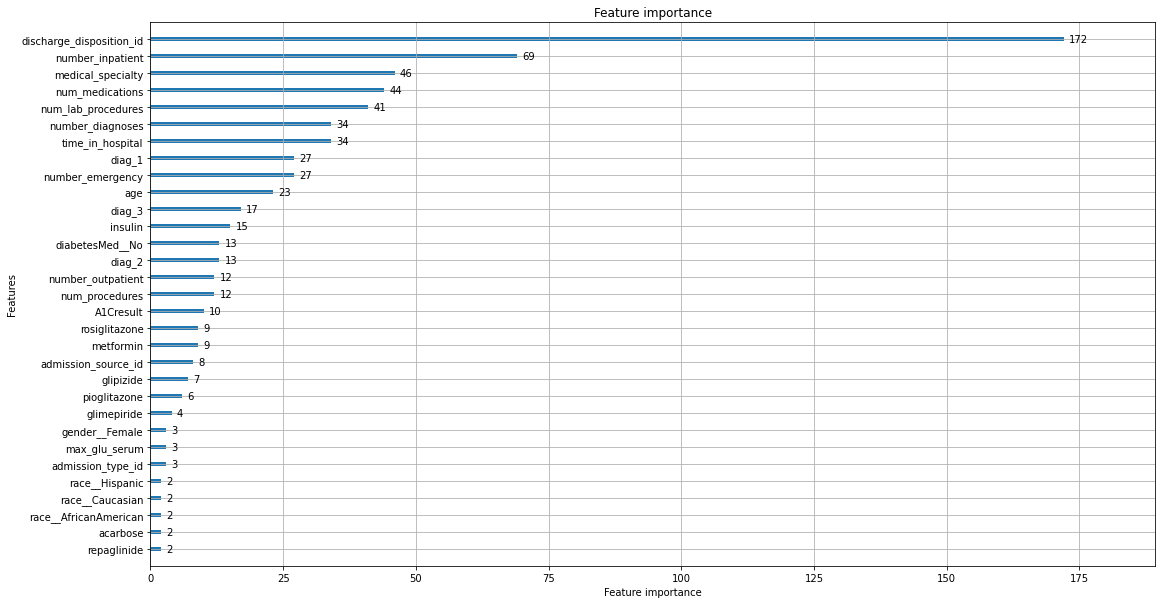

In [117]:
#duplicates for patient ID are to be dropped only from the training set!

train = pro_data[pro_data.dataset_type == 'train']
list_drop_initial_3 = ['readmitted','dataset_type','patient_nbr']
train.drop(list_drop_initial_3, axis = 1, inplace = True)

feature_cols = []

for c in train.columns:
    if c in 'Target':
        continue
    feature_cols.append(c)

train_x = train[feature_cols] # Features
train_y = train.Target # Target attribute


#Method 1 - RFECV uses the Bernoulli Navies Bayes to identify the best feature set since the majority of the data set is discrete.
feat_selector = RFECV(estimator= BernoulliNB(), scoring='roc_auc')
feat_selector.fit(train_x,train_y)
print("Method 1 (RFECV) - Best Features Selection:")
print('Features selected: ',feat_selector.n_features_)
selected_features = [f for f in train_x.columns[feat_selector.ranking_ == 1]]
print(len(selected_features)) 
print(selected_features)
 
#Method 2 - Feature Selection through LGBM works best for tree's creation where below our models selection are also tree based namely Decision Tree and Random Forest 
lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(train_x, train_y)

plt.rcParams["figure.figsize"] = (18, 10)
lgb.plot_importance(lgbm_model)

feature_imp = pd.Series(lgbm_model.feature_importances_, index = train_x.columns)
best_features = feature_imp.nlargest(25)
best_features = best_features.index.to_list()
print("")
print("Method 2 (LGBM) - Best Features Selection:")
print(best_features)

<b>Notes:  </b> Two methods were implemented to find the best feature set, after extensive testing RFECV(Recursive feature elimination method with cross-validation) resulted in 40 features as compared to the fixed ones we can select through the LGBM feature importance method. The results for the LGBM feature importance method were more accurate.

#### Duplicates removal from training set

In [118]:
#Removal of duplicates from train set for Model Performance improvement
X_training = pro_data[pro_data.dataset_type == 'train']
X_training.drop_duplicates(['patient_nbr'], inplace = True)

X_training.drop(['readmitted','dataset_type'], axis = 1, inplace = True)

### Training and Test Sets Formation 

In [119]:
#training and test dataset formation 

drop_list = ['Target','dataset_type']

#Training sets
y_train = pd.DataFrame()
X_train = X_training.copy()
y_train['Target'] = X_training['Target'].copy()

#Method 1 features selection for training set - RFECV
#X_train = X_train[selected_features]

#Method 2 features selection for training set - LGBM
X_train = X_train[best_features]


#X_train.drop(drop_list, axis = 1, inplace = True)

print('Train sets:')
print(X_train.shape)
print(y_train.shape)

#Testing sets
y_test = pd.DataFrame()
X_test = pro_data[pro_data.dataset_type == 'test']

y_test['Target'] = X_test['Target'].copy()

#Method 1 features selection for training set - RFECV
#X_test = X_test[selected_features]

#Method 2 features selection for training set - LGBM
X_test = X_test[best_features]

#X_test.drop(drop_list, axis =1, inplace = True)

print('Test sets:')
print(X_test.shape)
print(y_test.shape)

Train sets:
(57148, 25)
(57148, 1)
Test sets:
(25442, 25)
(25442, 1)


#### Class Imbalance Resolution

In [120]:
#check for class imbalance
print(pd.value_counts(y_train.Target))

1    52707
0     4441
Name: Target, dtype: int64


In [50]:
#Resolve class imbalance method 1 OverSampling
oversample = imblearn.over_sampling.SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)
print(pd.value_counts(y_train.Target))

0    52707
1    52707
Name: Target, dtype: int64
Class imbalance resolved!


In [121]:
#Resolve class imbalance method 2 Combined Oversampling & Undersampling
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_train, y_train  = smote_enn.fit_resample(X_train, y_train)
print("Class imbalance resolved!")

<b> Notes for Class imbalance method: </b>  The SMOTEEN has been the priority method for solving of class imbalance because it utlises both types of sampling methods (Unsampling & Oversampling to solve the class imbalance issue). Results from the SMOTE resulted in random values of the Target Class '0' not be randomised properly, causing the recall and precision of the said target class attribute to fall way below normal conditions. 

## Models Development & Evaluation

#### Decision Tree Model

Accuracy with train set: 0.7894152654449272
Accuracy with Test set: 0.6049445798286298
Precision score: 0.8984761904761904
Recall score: 0.6260673361943105
F1 score: 0.7379344510207807
Confusion Matrix:


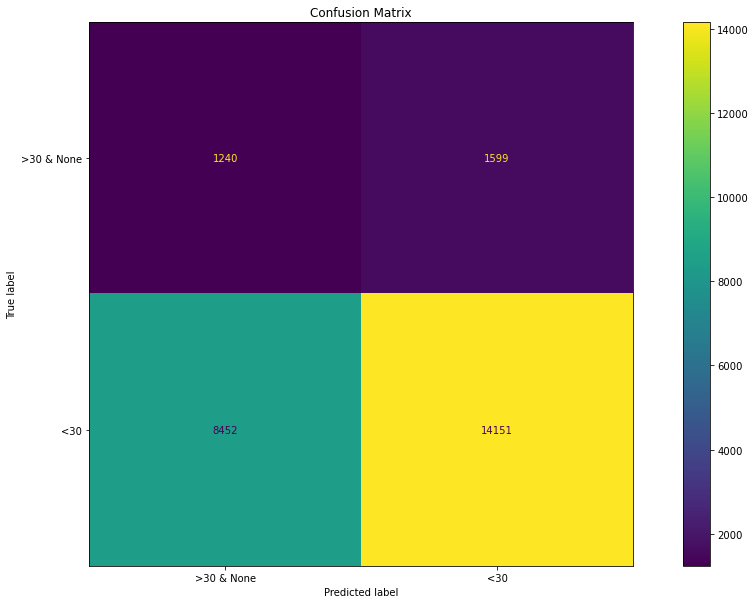

In [181]:
#Creation of Decision Tree Classifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth= 10, splitter='random')

# Train RF Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for training dataset
y_pred_train = clf.predict(X_train)

# Model Accuracy  for training set
print("Accuracy with train set:",metrics.accuracy_score(y_train, y_pred_train))

#Predict the response for Test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['>30 & None', '<30'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

In [182]:
#Classification report to check details of actual performacnce against class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.13      0.44      0.20      2839
           1       0.90      0.63      0.74     22603

    accuracy                           0.60     25442
   macro avg       0.51      0.53      0.47     25442
weighted avg       0.81      0.60      0.68     25442



Text(0, 0.5, 'Accuracy')

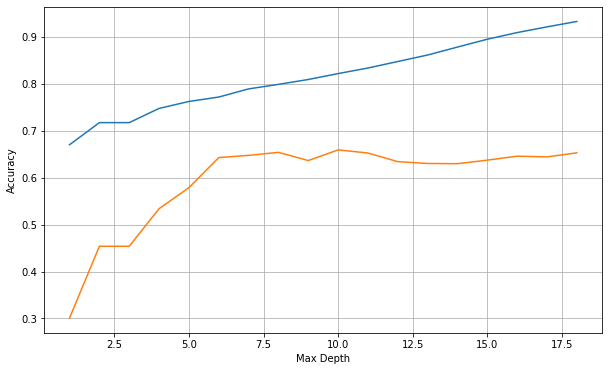

In [183]:
### Limit max_depth

# Iteration through different depth values to find the value that minimizes *validation* error. 

clfs = []

max_depths = range (1,20)

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
# Lets find the one that has the maximum validation set accuracy

acc_scores_test = [metrics.accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
acc_scores_train = [metrics.accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(max_depths[:-1], acc_scores_train[:-1], label = "Training")
plt.plot(max_depths[:-1], acc_scores_test[:-1], label = "Test")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

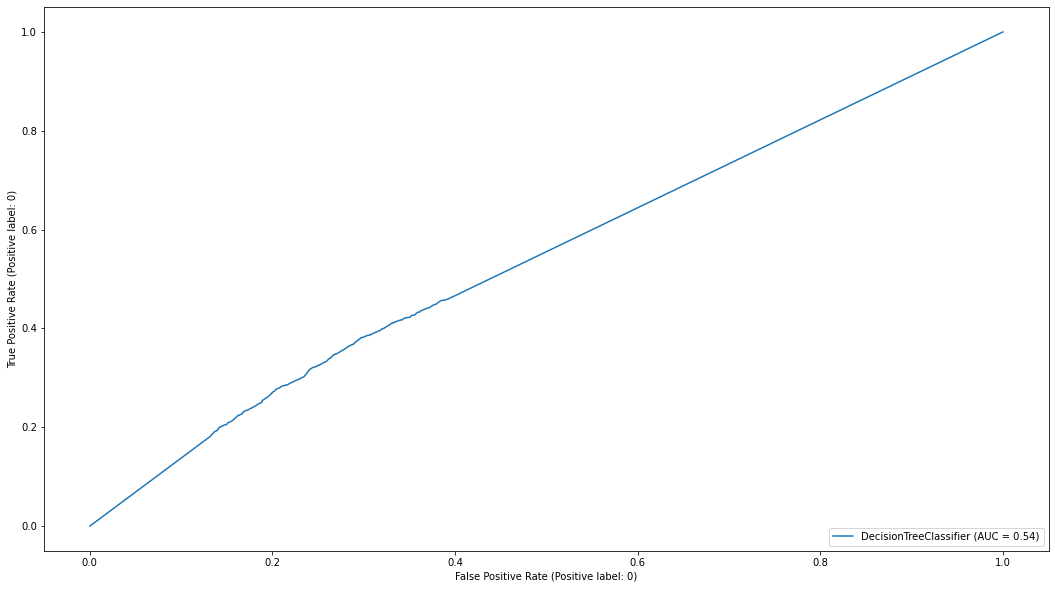

In [184]:
roc_auc = roc_auc_score(y_test, clf.predict(X_test),)
plot_roc_curve(clf, X_test, y_test,pos_label=0)

##### Results of multiple iterations of DT Model

In [228]:
dt_iter_df = pd.read_excel(path_model_results, sheet_name= "Decision_Tree")
dt_iter_df.head(5)

,Hyperparameters (Decision Tree),Train Accuacy,Test Accuracy,Precision Target Class (0),Recall Target Class (0),AUC
0,"criterion=""gini"", max_depth= 5",0.76240,0.5786,0.12,0.46,0.54
1,"criterion=""entropy"", max_depth= 7",0.78555,0.6367,0.13,0.40,0.54
2,"criterion=""entropy"", max_depth= 10",0.81660,0.6424,0.13,0.39,0.54
3,"criterion=""entropy"", max_depth= 8, splitter = random",0.78940,0.6050,0.13,0.44,0.54


#### Random Forest Model

Accuracy with train set: 0.9229170602682789
Accuracy with Test set: 0.7214448549642324
Precision score: 0.8987868818751927
Recall score: 0.773569880104411
F1 score: 0.8314905960957749
Confusion Matrix:


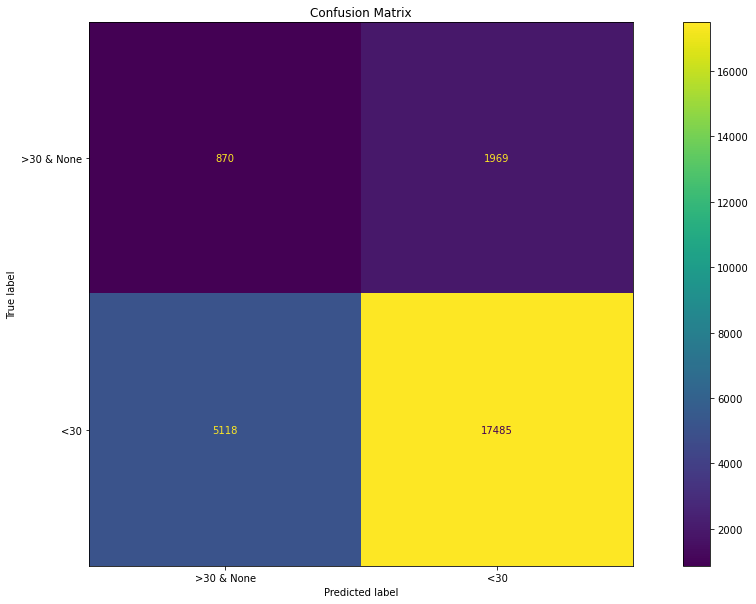

In [212]:
#Creation of Random Forest Classifier
dclf = RandomForestClassifier(n_estimators = 1500, criterion = "entropy" , random_state = 42, max_depth= 15, max_features = 22)

# Train RF Classifer
dclf = dclf.fit(X_train,y_train)

#Predict the response for training dataset
y_pred_train = dclf.predict(X_train)


# Model Accuracy  for training set
print("Accuracy with train set:",metrics.accuracy_score(y_train, y_pred_train))

#Predict the response for Test dataset
y_pred_test = dclf.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['>30 & None', '<30'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

In [217]:
#Classification report to check details of actual performance against class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.15      0.31      0.20      2839
           1       0.90      0.77      0.83     22603

    accuracy                           0.72     25442
   macro avg       0.52      0.54      0.51     25442
weighted avg       0.81      0.72      0.76     25442



Text(0, 0.5, 'Accuracy')

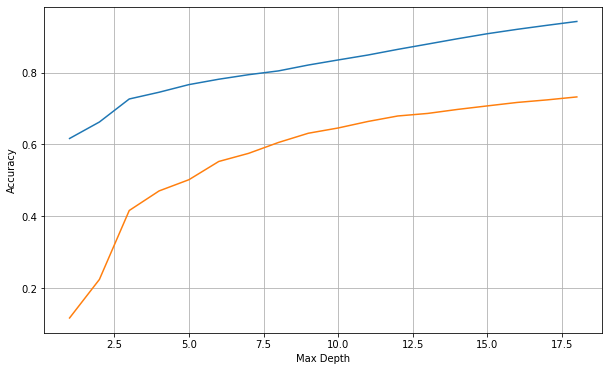

In [214]:
### Limit max_depth

# Iteration through different depth values to find the value that minimizes *validation* error. 

dclfs = []

max_depths = range (1,20)

for max_depth in max_depths:
    dclf =  RandomForestClassifier(max_depth=max_depth)
    dclf.fit(X_train, y_train)
    dclfs.append(dclf)
    
# Lets find the one that has the maximum validation set accuracy

acc_scores_test = [metrics.accuracy_score(y_test, dclf.predict(X_test)) for dclf in dclfs]
acc_scores_train = [metrics.accuracy_score(y_train, dclf.predict(X_train)) for dclf in dclfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(max_depths[:-1], acc_scores_train[:-1], label = "Training")
plt.plot(max_depths[:-1], acc_scores_test[:-1], label = "Test")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

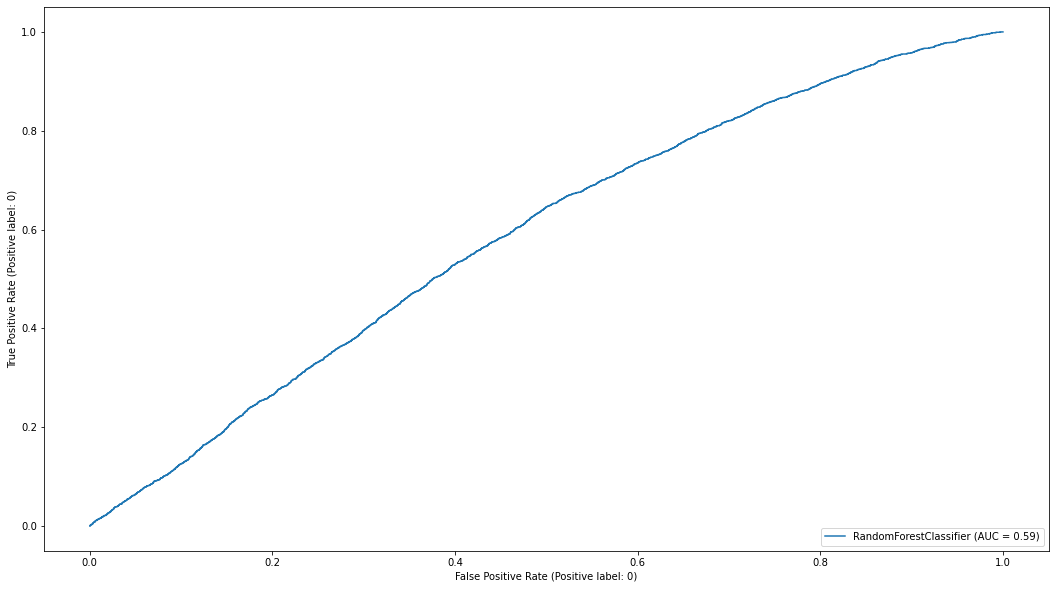

In [218]:
roc_auc = roc_auc_score(y_test, dclf.predict(X_test))
plot_roc_curve(dclf, X_test, y_test,pos_label=0) 

##### Results of multiple iterations of RF Model

In [227]:
rf_iter_df = pd.read_excel(path_model_results, sheet_name= "Random_Forest")
rf_iter_df.head(5)

,Hyperparameters (Random Forest),Train Accuacy,Test Accuracy,Precision Target Class (0),Recall Target Class (0),AUC
0,"n_estimators = 1000,criterion = ""entropy"" , random_state = 42, max_depth= 11, max_features= 25",0.85300,0.6900,0.14,0.34,0.59
1,"criterion = ""entropy"" , random_state = 42, max_depth= 8, max_features= 15",0.80650,0.6450,0.13,0.40,0.57
2,"criterion = ""gini"" , random_state = 42, max_depth= 10, max_features = 20",0.83983,0.6797,0.14,0.35,0.58
3,"n_estimators = 1500, criterion = ""entropy"" , random_state = 42, max_depth= 15, max_features = 22",0.92300,0.7214,0.15,0.31,0.59


#### Light Gradient Boosting Model


Accuracy with train set: 0.9744355752881164
Accuracy with Test set: 0.7777690433142048
Precision score: 0.8993826287760969
Recall score: 0.8443127018537362
F1 score: 0.870978047556022
Confusion Matrix:


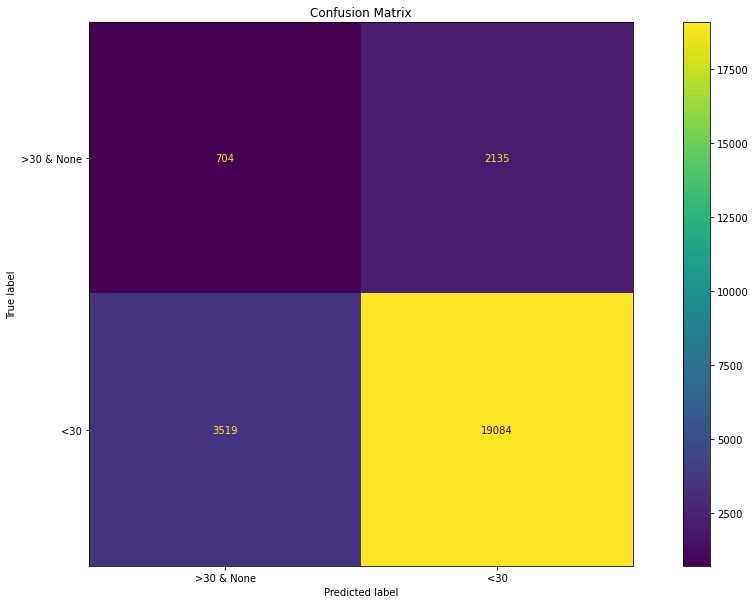

In [201]:
#Creation of LGBM Classifier
lgbm = LGBMClassifier(n_estimators = 1500 ,max_depth= 8)

# Train RF Classifer
lgbm = lgbm.fit(X_train,y_train)

#Predict the response for training dataset
y_pred_train = lgbm.predict(X_train)


# Model Accuracy  for training set
print("Accuracy with train set:",metrics.accuracy_score(y_train, y_pred_train))

#Predict the response for Test dataset
y_pred_test = lgbm.predict(X_test)

# Model Accuracy  for Test set
print("Accuracy with Test set:",metrics.accuracy_score(y_test, y_pred_test))

print("Precision score:",precision_score(y_test, y_pred_test))
print("Recall score:",recall_score(y_test, y_pred_test))
print("F1 score:",f1_score(y_test, y_pred_test))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_test)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['>30 & None', '<30'])
cmd_obj.plot()

cmd_obj.ax_.set(title='Confusion Matrix')
plt.show()

In [202]:
#Classification report to check details of actual performacnce against class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.17      0.25      0.20      2839
           1       0.90      0.84      0.87     22603

    accuracy                           0.78     25442
   macro avg       0.53      0.55      0.54     25442
weighted avg       0.82      0.78      0.80     25442



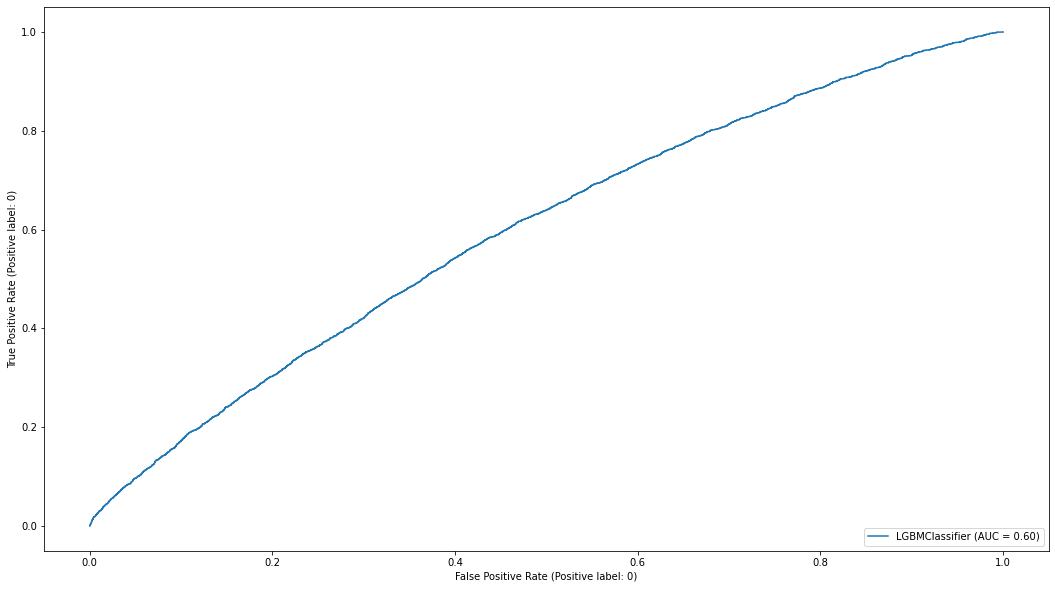

In [203]:
roc_auc = roc_auc_score(y_test, lgbm.predict(X_test))
plot_roc_curve(lgbm, X_test, y_test,pos_label=0) 

Text(0, 0.5, 'Accuracy')

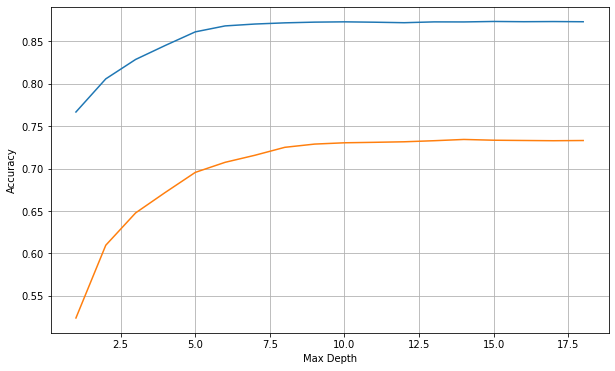

In [204]:
### Limit max_depth

# Iteration through different depth values to find the value that minimizes *validation* error. 

lgbm_mod = []

max_depths = range (1,20)

for max_depth in max_depths:
    lgbm_m =  LGBMClassifier(max_depth=max_depth)
    lgbm_m.fit(X_train, y_train)
    lgbm_mod.append(lgbm_m)
    
# Lets find the one that has the maximum validation set accuracy

acc_scores_test = [metrics.accuracy_score(y_test, lgbm_m.predict(X_test)) for lgbm_m in lgbm_mod]
acc_scores_train = [metrics.accuracy_score(y_train, lgbm_m.predict(X_train)) for lgbm_m in lgbm_mod]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(max_depths[:-1], acc_scores_train[:-1], label = "Training")
plt.plot(max_depths[:-1], acc_scores_test[:-1], label = "Test")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

##### Results of multiple iterations of LGBM Model

In [225]:
lgbm_iter_df = pd.read_excel(path_model_results, sheet_name= "LGBM")
lgbm_iter_df.head(5)

,Hyperparameters (LGBM),Train Accuacy,Test Accuracy,Precision Target Class (0),Recall Target Class (0),AUC
0,"n_estimators = 1000,random_state = 42, max_depth= 11",0.9570,0.77500,0.17,0.26,0.6
1,"n_estimators = 1000, max_depth= 8",0.9558,0.77108,0.17,0.26,0.6
2,"n_estimators = 500, boosting type = dart max_depth= 8",0.8878,0.74060,0.16,0.32,0.6
3,"n_estimators = 1500,boosting_type = 'goss' ,max_depth= 8",0.9696,0.76930,0.17,0.25,0.6


#### Models Hyper Parameter Tunings

##### Random Forest Hyper Parms Tuning

In [70]:
Rf = RandomForestClassifier()

Rf_params = {"max_depth": [2,5,8],
             "n_estimators": [100,200,500,700],
             "max_features": [3,5,8],
             "min_samples_split":[2,5,10]}

Rf_cv_model = GridSearchCV(Rf, Rf_params, cv=3, n_jobs=-1, verbose=2).fit(X_train, y_train)

Rf_cv_model.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 8,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 700}

##### LGBM Hyper Parms Tuning

In [73]:
lgbm = LGBMClassifier()

lgbm_params = {"learning_rate":[0.01,0.1,0.05],
              "n_estimators": [100,200,500],
               "subsample":[0.1,0.2],
              "max_depth":[2,3,5,8]}

lgbm_cv_model = GridSearchCV(lgbm,lgbm_params,cv=3,n_jobs=-1,verbose=2).fit(X_train,y_train)

lgbm_cv_model.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.1}

##### Decision Tree Hyper Parms Tuning

In [144]:
DT = DecisionTreeClassifier()

params = {
    'max_depth': [4, 6, 9, 11, 13, 16 ,20],
    'min_samples_leaf': [10, 20, 30, 40, 50, 100],
    'criterion': ["gini", "entropy"]
}

DT_cv_model = GridSearchCV(estimator=DT, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy").fit(X_train,y_train)

DT_cv_model.best_params_

Fitting 4 folds for each of 84 candidates, totalling 336 fits


{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}

#### Re-training predective model with tuned hyperparams 

- Training Decision Tree with Tunied Hyper parameters. (GridSearchCV is been used to find the best fit of parameters for the model excution)

Training Set Accuracy: 0.8870796334781788
Test Set Accuracy: 0.6673217514346357
              precision    recall  f1-score   support

           0       0.13      0.36      0.20      2839
           1       0.90      0.71      0.79     22603

    accuracy                           0.67     25442
   macro avg       0.52      0.53      0.49     25442
weighted avg       0.81      0.67      0.72     25442



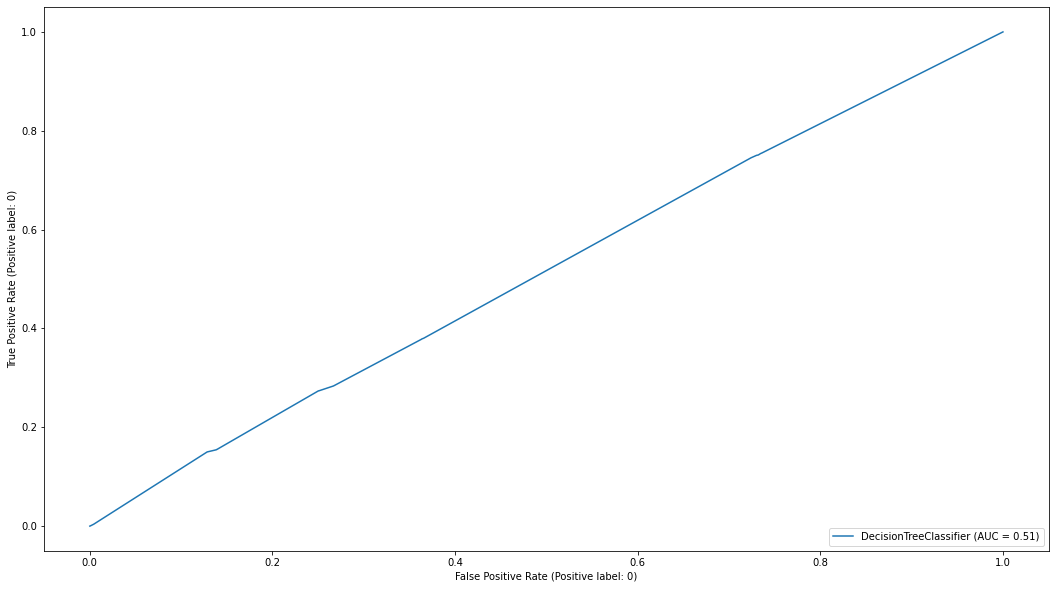

In [146]:
# Training DT classifier with Tuned Hyper parameters 
from sklearn.pipeline import Pipeline
DT_model = DecisionTreeClassifier(criterion = 'gini', max_depth= 20, min_samples_leaf= 10)
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("Decision Tree Classifier", DT_model)
])

# Train Decision Tree Classifer
pipeline = pipeline.fit(X_train,y_train)

y_pred_train = pipeline.predict(X_train)
print("Training Set Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

# Predict the response for test dataset
y_pred_test = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

roc_auc = roc_auc_score(y_test, DT_model.predict(X_test))
plot_roc_curve(DT_model, X_test, y_test,pos_label=0)  

<b> Analysis for DT:</b> The tuning of hyperparmeter caused the increase in overall accuracy across training and test sets, the AUC increased minutly. Recall score for the target class '0' dropped by a few percents. Showing the ability of a Decision Tree model to predict all the relevant class '0' fell.

Training Set Accuracy: 0.811035802002645
Test Set Accuracy: 0.6278201399261064
              precision    recall  f1-score   support

           0       0.13      0.42      0.20      2839
           1       0.90      0.65      0.76     22603

    accuracy                           0.63     25442
   macro avg       0.52      0.54      0.48     25442
weighted avg       0.81      0.63      0.70     25442



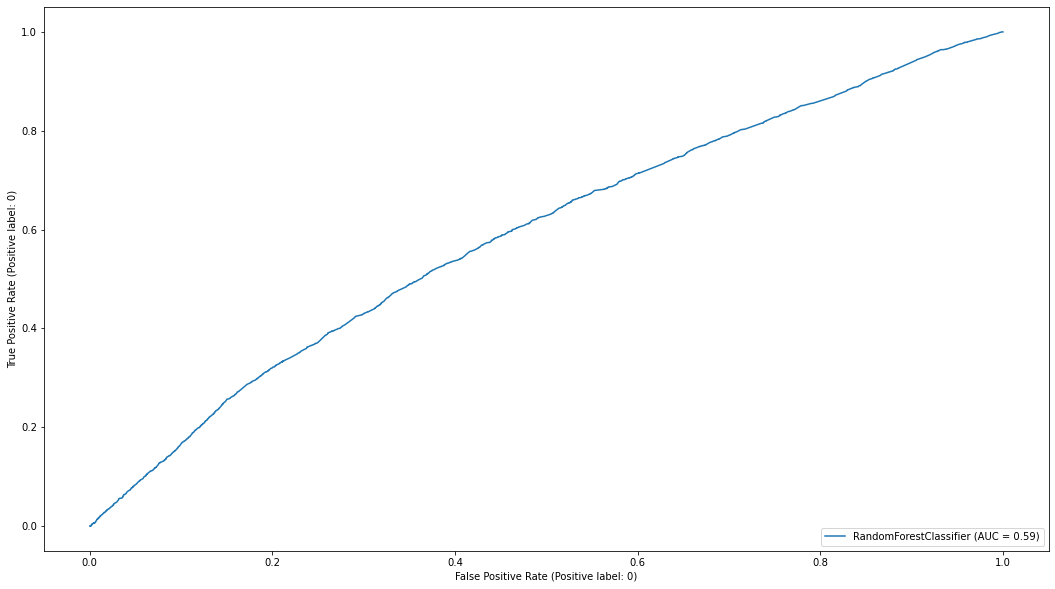

In [147]:
# Training RF classifier with Tuned Hyper parameters 
RF_model = RandomForestClassifier( max_depth= 8, max_features = 8, min_samples_split = 2, n_estimators = 700)

#pipeline containing both the MinMaxScaler and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("RF", RF_model)
])

# Train LGBM Classifer 
pipeline = pipeline.fit(X_train,y_train)
# Predict the response for train dataset

y_pred_train = pipeline.predict(X_train)
print("Training Set Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
# Predict the response for test dataset
y_pred_test = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

roc_auc = roc_auc_score(y_test, RF_model.predict(X_test))
plot_roc_curve(RF_model, X_test, y_test,pos_label=0) 

<b> Analysis for RF:</b> The tuning of hyperparmeter caused the increase in overall accuracy across training and test sets, the AUC increased minutly. Recall score for the target class '0' dropped by a few percents. Showing the ability of a Decision Tree model to predict all the relevant class '0' fell.

Training Set Accuracy: 0.8275080294728887
Test Set Accuracy: 0.6440531404763776
              precision    recall  f1-score   support

           0       0.14      0.42      0.21      2839
           1       0.90      0.67      0.77     22603

    accuracy                           0.64     25442
   macro avg       0.52      0.55      0.49     25442
weighted avg       0.82      0.64      0.71     25442



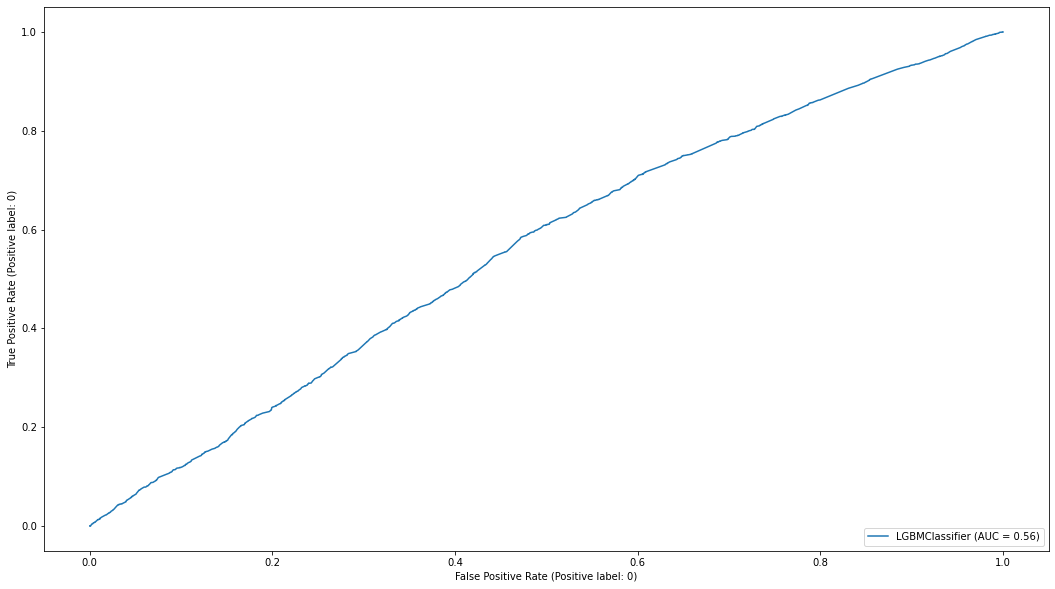

In [148]:
# Training LGBM classifier with Tuned Hyper parameters 
lgbm_model = LGBMClassifier(learning_rate= 0.05, max_depth= 3, n_estimators= 200, subsample = 0.1) #model is LGBM classifier

#pipeline containing both the MinMaxScaler and model type
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("LGBM", lgbm_model)
])

# Train LGBM Classifer 
pipeline = pipeline.fit(X_train,y_train)
# Predict the response for train dataset

y_pred_train = pipeline.predict(X_train)
print("Training Set Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

# Predict the response for test dataset
y_pred_test = pipeline.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

roc_auc = roc_auc_score(y_test, lgbm_model.predict(X_test))
plot_roc_curve(lgbm_model, X_test, y_test,pos_label=0) 

<b> Analysis for LGBM:</b> The tuning of hyperparmeters caused a decrease in overall accuracy across training and test sets significanlty (test set - 0.77 to 0.64), the AUC decreased minutly. Recall score for the target class '0' improved quite a bit (0.32-0.42) for boosting type = 'dart'. The  Precision nearly remained the same. The inversely proportional trade off b/w recall score for Target class '0' and accuracy of the overall prediction is quick significant.   

#### K-fold Cross Validation

In [236]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

k = 5
kf = KFold(n_splits=k, random_state=None)

acc_score_DT = []
acc_score_RF = []
acc_score_LG = []

X_training.reset_index(inplace= True)
y = X_training['Target']
X = X_training.drop(columns='Target')


for train_index , test_index in kf.split(X):

    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model_DT = DecisionTreeClassifier(criterion="gini", max_depth=5)
    model_RF = RandomForestClassifier(n_estimators = 1000, random_state = 42)
    model_LG = LGBMClassifier()
    

    model_DT.fit(X_train,y_train)
    model_LG.fit(X_train,y_train)
    model_RF.fit(X_train,y_train)

    pred_values_DT = model_DT.predict(X_test)
    pred_values_LG = model_LG.predict(X_test)
    pred_values_RF = model_RF.predict(X_test)

    acc_DT = accuracy_score(pred_values_DT , y_test)
    acc_LG = accuracy_score(pred_values_LG , y_test)
    acc_RF = accuracy_score(pred_values_RF , y_test)

    acc_score_DT.append(acc_DT)
    acc_score_RF.append(acc_RF)
    acc_score_LG.append(acc_LG)
     
avg_acc_score_DT = sum(acc_score_DT)/k
avg_acc_score_LG = sum(acc_score_LG)/k
avg_acc_score_RF = sum(acc_score_RF)/k


print('accuracy of each fold for LGBM - {}'.format(acc_score_LG))
print('Avg accuracy for LGBM : {}'.format(avg_acc_score_LG))

print('accuracy of each fold for DT- {}'.format(acc_score_DT))
print('Avg accuracy for DT: {}'.format(avg_acc_score_DT))

print('accuracy of each fold for RF - {}'.format(acc_score_RF))
print('Avg accuracy for RF : {}'.format(avg_acc_score_RF))

accuracy of each fold for LGBM - [0.8986876640419947, 0.9101487314085739, 0.926159230096238, 0.9308775920902966, 0.9454020474232216]
Avg accuracy for LGBM : 0.922255053012065
accuracy of each fold for DT- [0.8975503062117235, 0.9095363079615049, 0.9258092738407699, 0.9301776183393122, 0.9455770408609677]
Avg accuracy for DT: 0.9217301094428556
accuracy of each fold for RF - [0.8984251968503937, 0.9102362204724409, 0.926246719160105, 0.9307025986525506, 0.9458395310175869]
Avg accuracy for RF : 0.9222900532306154


<b> Conculsion: </b>
This real world dataset had a lot of discrepancies which have resulted in the sub-optimised models. The dataset has a major class imbalance problem, which even solving through sampling techniques has resulted in some impact on the end-result. Multiple Models namely, decision tree, random forest and light gradient boosting models have been implemented out which the LGBM resulted in the best accuracy results (0.9570 - train &	0.77500 - test) and AUC (0.6) values. Best Features where extracted through measuring of feature importance via LGBM Classifier and BernulliNB based RFECV. One major observation is the recall and precision for "<30  admissions" is inversely propotional to the model accuracy. The recall and precision rates for "<30 admissions" can be improved through further addition of more data samples.

<b>Referance</b>:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
- https://www.aapc.com/codes/icd9-codes-range/
- https://www.w3schools.com/python/matplotlib_intro.asp
- https://elitedatascience.com/python-seaborn-tutorial
- https://imbalanced-learn.org/stable/combine.html
- https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
- https://medium.com/data-science-reporter/feature-selection-via-grid-search-in-supervised-models-4dc0c43d7ab1
- https://towardsdatascience.com/understanding-hyperparameters-and-its-optimisation-techniques-f0debba07568
